# Storytelling of Stockholms house price

In [2]:
# EDA  

import pandas as pd
import matplotlib.pyplot as plt 

df = pd.read_csv("data/hemnet_data_clean.csv")
df

,Unnamed: 0,address,asked_price,coordinate,final_price,pourcentage_difference,land_area,area,commune,price_per_area,rooms,sale_date,supplemental_area
0,0.0,Markviksvägen 15,6475000.0,"[59.371685, 17.8250389]",6950000,7.0,635.0,117.0,"Hässelby Södra Villastad, Stockholms kommun",59402.0,5.0,Såld 2022-06-17,44.0
1,1.0,Mälarhöjdsvägen 38,9950000.0,"[59.3008766, 17.9478054]",11300000,14.0,882.0,195.0,"Mälarhöjden - Hägersten, Stockholms kommun",57949.0,5.0,Såld 2022-06-17,22.0
2,2.0,Häradsvägen 202,5795000.0,"[59.27202322587505, 17.954076342308372]",6200000,7.0,1224.0,90.0,"Segeltorp, Huddinge kommun",68889.0,6.0,Såld 2022-06-17,90.0
3,3.0,Hemmansvägen 18,11950000.0,"[59.28390406370304, 18.07625832074728]",12700000,6.0,542.0,110.0,"Gamla Enskede, Stockholms kommun",115455.0,5.0,Såld 2022-06-17,48.0
4,4.0,Alholmsbacken 8,7950000.0,"[59.28134, 17.9009438]",8100000,2.0,690.0,157.0,"Skärholmshöjden., Stockholms kommun",51592.0,6.0,Såld 2022-06-17,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,45.9,Blackensvägen 63,9500000.0,"[59.2829447557, 17.9931258364]",11760000,24.0,624.0,164.0,"Älvsjö/Långbro, Stockholms kommun",71707.0,8.0,Såld 2022-02-25,70.0
496,46.9,Sätragårdsvägen 267,7295000.0,"[59.28763, 17.9020538]",7295000,0.0,618.0,125.0,"Sätra, Stockholms kommun",58360.0,NaN,Såld 2022-02-25,81.0
497,47.9,Myntvägen 11B,9795000.0,"[59.392398241832566, 17.855415529146335]",10200000,4.0,700.0,172.0,"Skälby, Järfälla kommun",59302.0,6.0,Såld 2022-02-25,36.0
498,48.9,Fyndevägen 5,11950000.0,"[59.4293953737, 17.9294253117]",13000000,9.0,1307.0,174.0,"Töjnan, Sollentuna kommun",74713.0,8.0,Såld 2022-02-24,90.0


In [3]:
df.columns

Index(['Unnamed: 0', 'address', 'asked_price', 'coordinate', 'final_price',
       'pourcentage_difference', 'land_area', 'area', 'commune',
       'price_per_area', 'rooms', 'sale_date', 'supplemental_area'],
      dtype='object')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Unnamed: 0              500 non-null    float64
 1   address                 500 non-null    object 
 2   asked_price             500 non-null    float64
 3   coordinate              500 non-null    object 
 4   final_price             500 non-null    int64  
 5   pourcentage_difference  500 non-null    float64
 6   land_area               495 non-null    float64
 7   area                    499 non-null    float64
 8   commune                 500 non-null    object 
 9   price_per_area          499 non-null    float64
 10  rooms                   490 non-null    float64
 11  sale_date               500 non-null    object 
 12  supplemental_area       500 non-null    float64
dtypes: float64(8), int64(1), object(4)
memory usage: 50.9+ KB


In [5]:
df['final_price'].head()

0     6950000
1    11300000
2     6200000
3    12700000
4     8100000
Name: final_price, dtype: int64

In [6]:
df['commune'].head()

0    Hässelby Södra Villastad, Stockholms kommun
1     Mälarhöjden - Hägersten, Stockholms kommun
2                     Segeltorp, Huddinge kommun
3               Gamla Enskede, Stockholms kommun
4            Skärholmshöjden., Stockholms kommun
Name: commune, dtype: object

In [7]:
commune_prices = df[['commune', 'final_price']]
commune_prices.head(30)

,commune,final_price
0,"Hässelby Södra Villastad, Stockholms kommun",6950000
1,"Mälarhöjden - Hägersten, Stockholms kommun",11300000
2,"Segeltorp, Huddinge kommun",6200000
3,"Gamla Enskede, Stockholms kommun",12700000
4,"Skärholmshöjden., Stockholms kommun",8100000
5,"Enskede Gård, Stockholms kommun",16400000
6,"Johannesdal - Vårberg, Stockholms kommun",4910000
7,"Vällingby - Råcksta Trädgårdsstad, Stockholms ...",7195000
8,"Trollbäcken/Hanviken, Tyresö kommun",6070000
9,"Spånga Solhem, Stockholms kommun",8500000


In [8]:
df['municipality'] = df['commune'].str.split(',').str[-1].str.strip()
municipality_prices = df.groupby('municipality')['final_price'].mean().sort_values(ascending=False).round()
municipality_prices


municipality
Lidingö kommun        20800000.0
Danderyds kommun      18100000.0
Sundbybergs kommun    11691667.0
Nacka kommun          11502273.0
Stockholms kommun     10413817.0
Sollentuna kommun      9704200.0
Huddinge kommun        8352177.0
Tyresö kommun          8138906.0
Järfälla kommun        8110217.0
Ekerö kommun           7887500.0
Name: final_price, dtype: float64

In [9]:
for municipality, price in municipality_prices.items():
    print(f"{municipality} - {price:,.0f} kr")


Lidingö kommun - 20,800,000 kr
Danderyds kommun - 18,100,000 kr
Sundbybergs kommun - 11,691,667 kr
Nacka kommun - 11,502,273 kr
Stockholms kommun - 10,413,817 kr
Sollentuna kommun - 9,704,200 kr
Huddinge kommun - 8,352,177 kr
Tyresö kommun - 8,138,906 kr
Järfälla kommun - 8,110,217 kr
Ekerö kommun - 7,887,500 kr


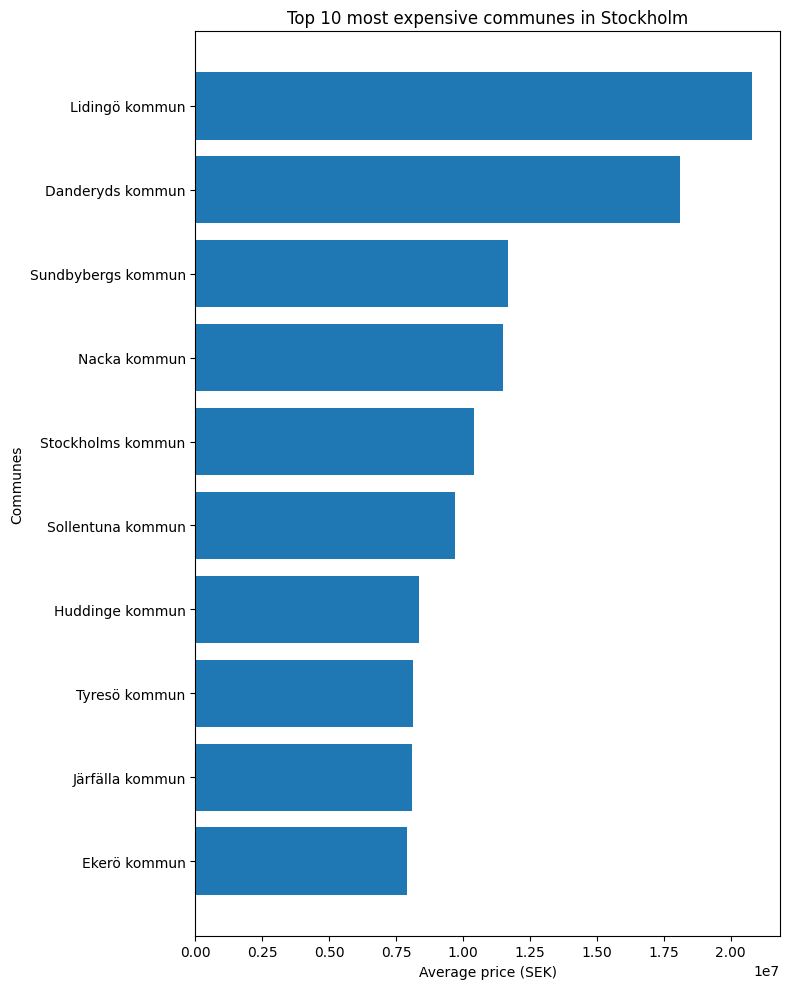

In [10]:
# Barh 

plt.figure(figsize=(8,10))
plt.barh(municipality_prices.index, municipality_prices.values)
plt.xlabel("Average price (SEK)")
plt.ylabel("Communes")
plt.title("Top 10 most expensive communes in Stockholm")
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

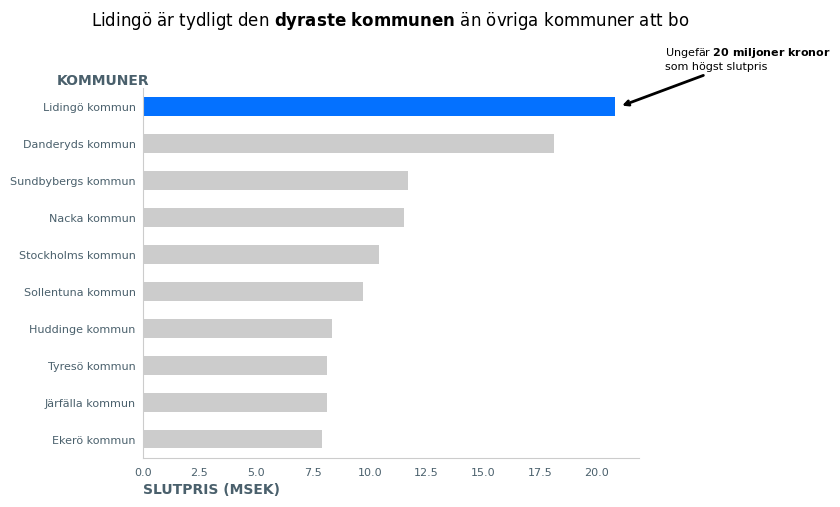

In [ ]:
# Storytelling

from constants import BLUE_1, GRAY_3, GRAY_1

colors = [GRAY_1] * len(municipality_prices)
colors[:1] = [BLUE_1] * 1 

municipality_msek = municipality_prices / 1_000_000

ax = municipality_msek.plot(kind="barh", color=colors)
ax.invert_yaxis()
ax.spines[["top", "right"]].set_visible(False) 
ax.spines[['left', 'bottom']].set_color(GRAY_1)

arrowprops = dict(arrowstyle="->", linewidth=2)
ax.tick_params(axis='both', colors=GRAY_3, labelsize=8, length=0, pad=7)
ax.tick_params(axis="y", pad=5)
ax.set_title("Lidingö är tydligt den " + r"$\bf {dyraste \ kommunen}$" + " än övriga kommuner att bo", pad=45)
ax.set_xlabel("SLUTPRIS (MSEK)", color=GRAY_3, loc="left", fontweight="bold")
ax.set_ylabel("KOMMUNER", color=GRAY_3, rotation=0, fontweight="bold")
ax.annotate(text="Ungefär " + r"$\bf{20 \ miljoner \ kronor}$" + " \nsom högst slutpris", xy=(21,0), xytext=(23, -1), fontsize=8, arrowprops=arrowprops)
ax.yaxis.set_label_coords(-0.08, 1)

fig = ax.get_figure()
fig.savefig("figures/lidingo_commune.png", bbox_inches='tight')

In [12]:
df = pd.read_csv("data/hemnet_data_clean.csv")
df

,Unnamed: 0,address,asked_price,coordinate,final_price,pourcentage_difference,land_area,area,commune,price_per_area,rooms,sale_date,supplemental_area
0,0.0,Markviksvägen 15,6475000.0,"[59.371685, 17.8250389]",6950000,7.0,635.0,117.0,"Hässelby Södra Villastad, Stockholms kommun",59402.0,5.0,Såld 2022-06-17,44.0
1,1.0,Mälarhöjdsvägen 38,9950000.0,"[59.3008766, 17.9478054]",11300000,14.0,882.0,195.0,"Mälarhöjden - Hägersten, Stockholms kommun",57949.0,5.0,Såld 2022-06-17,22.0
2,2.0,Häradsvägen 202,5795000.0,"[59.27202322587505, 17.954076342308372]",6200000,7.0,1224.0,90.0,"Segeltorp, Huddinge kommun",68889.0,6.0,Såld 2022-06-17,90.0
3,3.0,Hemmansvägen 18,11950000.0,"[59.28390406370304, 18.07625832074728]",12700000,6.0,542.0,110.0,"Gamla Enskede, Stockholms kommun",115455.0,5.0,Såld 2022-06-17,48.0
4,4.0,Alholmsbacken 8,7950000.0,"[59.28134, 17.9009438]",8100000,2.0,690.0,157.0,"Skärholmshöjden., Stockholms kommun",51592.0,6.0,Såld 2022-06-17,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,45.9,Blackensvägen 63,9500000.0,"[59.2829447557, 17.9931258364]",11760000,24.0,624.0,164.0,"Älvsjö/Långbro, Stockholms kommun",71707.0,8.0,Såld 2022-02-25,70.0
496,46.9,Sätragårdsvägen 267,7295000.0,"[59.28763, 17.9020538]",7295000,0.0,618.0,125.0,"Sätra, Stockholms kommun",58360.0,NaN,Såld 2022-02-25,81.0
497,47.9,Myntvägen 11B,9795000.0,"[59.392398241832566, 17.855415529146335]",10200000,4.0,700.0,172.0,"Skälby, Järfälla kommun",59302.0,6.0,Såld 2022-02-25,36.0
498,48.9,Fyndevägen 5,11950000.0,"[59.4293953737, 17.9294253117]",13000000,9.0,1307.0,174.0,"Töjnan, Sollentuna kommun",74713.0,8.0,Såld 2022-02-24,90.0


In [13]:
df["municipality"] = df['commune'].str.split(',').str[-1].str.strip()
municipalities = df["municipality"]
municipalities

0      Stockholms kommun
1      Stockholms kommun
2        Huddinge kommun
3      Stockholms kommun
4      Stockholms kommun
             ...        
495    Stockholms kommun
496    Stockholms kommun
497      Järfälla kommun
498    Sollentuna kommun
499    Stockholms kommun
Name: municipality, Length: 500, dtype: object

In [14]:
stockholm_areas = df[df["municipality"] == 'Stockholms kommun']
stockholm_areas

,Unnamed: 0,address,asked_price,coordinate,final_price,pourcentage_difference,land_area,area,commune,price_per_area,rooms,sale_date,supplemental_area,municipality
0,0.0,Markviksvägen 15,6475000.0,"[59.371685, 17.8250389]",6950000,7.0,635.0,117.0,"Hässelby Södra Villastad, Stockholms kommun",59402.0,5.0,Såld 2022-06-17,44.0,Stockholms kommun
1,1.0,Mälarhöjdsvägen 38,9950000.0,"[59.3008766, 17.9478054]",11300000,14.0,882.0,195.0,"Mälarhöjden - Hägersten, Stockholms kommun",57949.0,5.0,Såld 2022-06-17,22.0,Stockholms kommun
3,3.0,Hemmansvägen 18,11950000.0,"[59.28390406370304, 18.07625832074728]",12700000,6.0,542.0,110.0,"Gamla Enskede, Stockholms kommun",115455.0,5.0,Såld 2022-06-17,48.0,Stockholms kommun
4,4.0,Alholmsbacken 8,7950000.0,"[59.28134, 17.9009438]",8100000,2.0,690.0,157.0,"Skärholmshöjden., Stockholms kommun",51592.0,6.0,Såld 2022-06-17,0.0,Stockholms kommun
5,5.0,Herrgårdsvägen 13,14500000.0,"[59.2924271, 18.06412]",16400000,13.0,529.0,136.0,"Enskede Gård, Stockholms kommun",120588.0,9.0,Såld 2022-06-17,64.0,Stockholms kommun
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
492,42.9,Svampvägen 145,14600000.0,"[59.2797204715327, 18.082009194502476]",15400000,5.0,903.0,162.0,"Gamla Enskede, Stockholms kommun",95062.0,6.0,Såld 2022-02-25,94.0,Stockholms kommun
493,43.9,Hagtornsvägen 33,15895000.0,"[59.278087082802976, 18.112684017076088]",15700000,1.0,763.0,137.0,"Enskededalen, Stockholms kommun",114599.0,8.0,Såld 2022-02-25,70.0,Stockholms kommun
495,45.9,Blackensvägen 63,9500000.0,"[59.2829447557, 17.9931258364]",11760000,24.0,624.0,164.0,"Älvsjö/Långbro, Stockholms kommun",71707.0,8.0,Såld 2022-02-25,70.0,Stockholms kommun
496,46.9,Sätragårdsvägen 267,7295000.0,"[59.28763, 17.9020538]",7295000,0.0,618.0,125.0,"Sätra, Stockholms kommun",58360.0,NaN,Såld 2022-02-25,81.0,Stockholms kommun


In [15]:
cheapest_areas = (
    stockholm_areas.groupby('commune')['final_price']
    .mean()
    .sort_values(ascending=True)
    .round()
    .reset_index()
)
cheapest_areas

,commune,final_price
0,"Kista, Stockholms kommun",4200000.0
1,"Johannesdal - Vårberg, Stockholms kommun",4910000.0
2,"Spånga - Sundby, Stockholms kommun",4945000.0
3,"Farsta, Stockholms kommun",5000000.0
4,"Skärholmen, Stockholms kommun",5358333.0
...,...,...
114,"Bromma - Stora Mossen, Stockholms kommun",25000000.0
115,"Bromma, Stockholms kommun",25000000.0
116,"Höglandet, Stockholms kommun",26000000.0
117,"Bromma - Höglandet, Stockholms kommun",28300000.0


In [16]:
cheapest_areas.head(10).reset_index()

,index,commune,final_price
0,0,"Kista, Stockholms kommun",4200000.0
1,1,"Johannesdal - Vårberg, Stockholms kommun",4910000.0
2,2,"Spånga - Sundby, Stockholms kommun",4945000.0
3,3,"Farsta, Stockholms kommun",5000000.0
4,4,"Skärholmen, Stockholms kommun",5358333.0
5,5,"Hässelby södra villastad, Stockholms kommun",5900000.0
6,6,"Vällingby - Vinsta, Stockholms kommun",6200000.0
7,7,"Hässelby - Norra Villastad, Stockholms kommun",6250000.0
8,8,"Sköndal - Norra Sköndal, Stockholms kommun",6250000.0
9,9,"Hässelby Norra Villastad, Stockholms kommun",6375000.0


In [18]:
# Average price 

stockholm_avg_prices = (
    stockholm_areas.groupby('commune')['final_price']
    .mean()
    .sort_values(ascending=False)
    .round()
    .reset_index()
)

stockholm_avg_prices.head()

,commune,final_price
0,"Bromma Höglandet, Stockholms kommun",31100000.0
1,"Bromma - Höglandet, Stockholms kommun",28300000.0
2,"Höglandet, Stockholms kommun",26000000.0
3,"Bromma, Stockholms kommun",25000000.0
4,"Bromma - Stora Mossen, Stockholms kommun",25000000.0


In [24]:
df = pd.read_csv("data/stockholm_homeprices_alt.csv")
df

,final_price,land_area,area,commune,price_per_area,rooms,sale_date,status
0,6950000,635.0,117.0,"Hässelby Södra Villastad, Stockholms kommun",59402.0,5.0,2023-05-04,Sold
1,11300000,882.0,195.0,"Mälarhöjden - Hägersten, Stockholms kommun",57949.0,5.0,2024-05-14,Sold
2,6200000,1224.0,90.0,"Segeltorp, Huddinge kommun",68889.0,6.0,2023-02-05,Available
3,12700000,542.0,110.0,"Gamla Enskede, Stockholms kommun",115455.0,5.0,2025-10-19,Sold
4,8100000,690.0,157.0,"Skärholmshöjden., Stockholms kommun",51592.0,6.0,2023-03-08,Available
...,...,...,...,...,...,...,...,...
495,11760000,624.0,164.0,"Älvsjö/Långbro, Stockholms kommun",71707.0,8.0,2023-10-05,Sold
496,7295000,618.0,125.0,"Sätra, Stockholms kommun",58360.0,NaN,2024-07-18,Sold
497,10200000,700.0,172.0,"Skälby, Järfälla kommun",59302.0,6.0,2024-09-21,Sold
498,13000000,1307.0,174.0,"Töjnan, Sollentuna kommun",74713.0,8.0,2023-01-14,Available


In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   final_price     500 non-null    int64  
 1   land_area       495 non-null    float64
 2   area            499 non-null    float64
 3   commune         500 non-null    object 
 4   price_per_area  499 non-null    float64
 5   rooms           490 non-null    float64
 6   sale_date       500 non-null    object 
 7   status          500 non-null    object 
dtypes: float64(4), int64(1), object(3)
memory usage: 31.4+ KB


In [26]:
df.keys()

Index(['final_price', 'land_area', 'area', 'commune', 'price_per_area',
       'rooms', 'sale_date', 'status'],
      dtype='object')